# Clean the data

 Before doing anything we have to clean up the data

In [1]:
# import libraries
import json
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
# main dataframe
df1 = pd.read_csv("games.csv")

In [3]:
#all the columns from the dataframe above
df1.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [4]:
# As it can be seen the columns for the victorious team, the champions 
# and the summoner spells all show their respective IDs instead of their names
df1[['winner','t1_champ1id','t1_champ1_sum1']]

,winner,t1_champ1id,t1_champ1_sum1
0,1,8,12
1,1,119,7
2,1,18,4
3,1,57,4
4,1,19,4
5,1,40,3
6,1,74,3
7,1,150,12
8,2,111,12
9,2,427,4


In [5]:
# Using a json file with the champions information in order to change 
# the id to the names in the main dataframe
champsread = pd.read_json('champion_info_2.json')
champs = pd.read_json((champsread['data']).to_json(), orient='index')
# make index to id in order to facilitate the change of id to names
champs.set_index(['id'], inplace=True)

In [6]:
# list of the columns I want to change the id to the names of the champions 
Champions = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
Bans = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]

In [7]:
# defining a function to change champion ids into names
def Champnames(ID, dictionary):
    champion = dictionary['name'][ID]
    return champion

In [8]:
 # call the Champnames function to change champions ids into names for the champion picks columns
for n in Champions:
    df1[n] = df1[n].apply(lambda x: Champnames(x, champs))

In [9]:
 # call the Champnames function to change champions ids into names for the champion bans columns
for n in Bans:
    df1[n] = df1[n].apply(lambda x: Champnames(x, champs)) 

In [10]:
# Using a json file with the summoner spells information in order to change the id to the names
# in the main dataframe
SSpellsread = pd.read_json('summoner_spell_info.json')
SSpells= pd.read_json((SSpellsread['data']).to_json(),orient='index')

In [11]:
#  list of the columns I want to change the id to the names of the summoner spells
SumSpells = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

In [12]:
# Using Champnames to change the id of summoner spells into their names
for n in SumSpells:
    df1[n] = df1[n].apply(lambda x: Champnames(x, SSpells))

In [13]:
# Change the numerical values corresponding to either team  to blue team 
# and red team (the actual names of the teams) for the given columns
columnslist=['winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald']
for n in columnslist:
    df1[n].replace(1, 'blue team',inplace=True)
    df1[n].replace(2, 'red team',inplace=True)
    df1[n].replace(0, 'no one',inplace=True)

In [14]:
# delete unnecessary columns
df1.drop(['creationTime',"seasonId"], axis = 1, inplace = True)

In [15]:
#Renaming columns to more readable headers
df1.columns= ['Game ID', 'Game Duration','Winner',
       'First Blood', 'First Tower', 'First Inibitor', 'First Baron',
       'First Dragon', 'First Rift Herald', 'Team 1 Champ 1', 'Team 1 Champ 1 Sum 1',
       'Team 1 Champ 1 Sum 2', 'Team 1 Champ 2', 'Team 1 Champ 2 Sum 1', 'Team 1 Champ 2 Sum 2',
       'Team 1 Champ 3', 'Team 1 Champ 3 Sum 1', 'Team 1 Champ 3 Sum 2', 'Team 1 Champ 4',
       'Team 1 Champ 4 Sum 1', 'Team 1 Champ 4 Sum 2', 'Team 1 Champ 5', 'Team 1 Champ 5 Sum 1',
       'Team 1 Champ 5 Sum 2', 'Team 1 Tower Kills', 'Team 1 Inhibitor Kills', 'Team 1 Baron Kills',
       'Team 1 Dragon Kills', 'Team 1 Rift Herald Kills', 'Team 1 Ban 1', 'Team 1 Ban 2', 'Team 1 Ban 3',
       'Team 1 Ban 4', 'Team 1 Ban 5', 'Team 2 Champ 1', 'Team 2 Champ 1 Sum 1',
       'Team 2 Champ 1 Sum 2', 'Team 2 Champ 2', 'Team 2 Champ 2 Sum 1', 'Team 2 Champ 2 Sum 2',
       'Team 2 Champ 3', 'Team 2 Champ 3 Sum 1', 'Team 2 Champ 3 Sum 2', 'Team 2 Champ 4',
       'Team 2 Champ 4 Sum 1', 'Team 2 Champ 4 Sum 2', 'Team 2 Champ 5', 'Team 2 Champ 5 Sum 1',
       'Team 2 Champ 5 Sum 2', 'Team 2 Tower Kills', 'Team 2 Inhibitor Kills', 'Team 2 Baron Kills',
       'Team 2 Dragon Kills', 'Team 2 Rift Herald Kills', 'Team 2 Ban 1', 'Team 2 Ban 2', 'Team 2 Ban 3',
       'Team 2 Ban 4', 'Team 2 Ban 5']

# Analysing the data

In [16]:
# mean of selected columns
mean_Game_Duration=df1["Game Duration"].mean()
mean_Tower_Kills= (df1["Team 1 Tower Kills"].mean() + df1["Team 2 Tower Kills"].mean())/2
mean_Inhibitor_Kills=(df1["Team 1 Inhibitor Kills"].mean() + df1["Team 2 Inhibitor Kills"].mean())/2
mean_Baron_Kills=(df1["Team 1 Baron Kills"].mean() + df1["Team 2 Baron Kills"].mean())/2
mean_Dragon_Kills=(df1["Team 1 Dragon Kills"].mean() + df1["Team 1 Dragon Kills"].mean())/2
mean_Rift_Herald_Kills=(df1["Team 1 Rift Herald Kills"].mean() + df1["Team 2 Rift Herald Kills"].mean())/2

In [17]:
mean_Game_Duration


1832.3628083122937

In [18]:
mean_Tower_Kills

5.6244125072829672

In [19]:
mean_Inhibitor_Kills

1.0013109341619733

In [20]:
mean_Baron_Kills

0.39341619731986793

In [21]:
mean_Dragon_Kills

1.3871819770829288

In [22]:
mean_Rift_Herald_Kills

0.24578558943484174

In [23]:
# Win loss ratio
df1['Winner'].value_counts()

blue team    26077
red team     25413
Name: Winner, dtype: int64

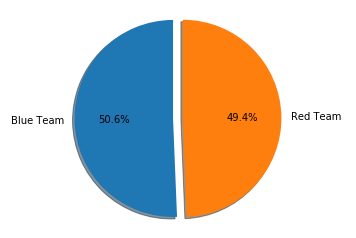

In [24]:
# Pie chart of win loss ratio
labels = 'Blue Team', 'Red Team'
sizes = [26077, 25413]
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [25]:
#list of champion picks
Pickslist = pd.concat([df1['Team 1 Champ 1'],df1['Team 1 Champ 2'],df1['Team 1 Champ 3'],df1['Team 1 Champ 3'],df1['Team 1 Champ 2'],
                     df1['Team 2 Champ 1'],df1['Team 2 Champ 2'],df1['Team 2 Champ 3'],df1['Team 2 Champ 4'],df1['Team 2 Champ 5']],
                     ignore_index=True)

In [26]:
#list of champion bans
Banslist = pd.concat([df1['Team 1 Ban 1'],df1['Team 1 Ban 2'],df1['Team 1 Ban 3'],df1['Team 1 Ban 4'],df1['Team 1 Ban 5'],
                     df1['Team 2 Ban 1'],df1['Team 2 Ban 2'],df1['Team 2 Ban 3'],df1['Team 2 Ban 4'],df1['Team 2 Ban 5']],
                     ignore_index=True)

In [27]:
# Most common Champions bar graph
sns.countplot(y=Pickslist, data=df1, ax=ax1)
ax1.set_title('Most Common Champion Picks')
plt.show()


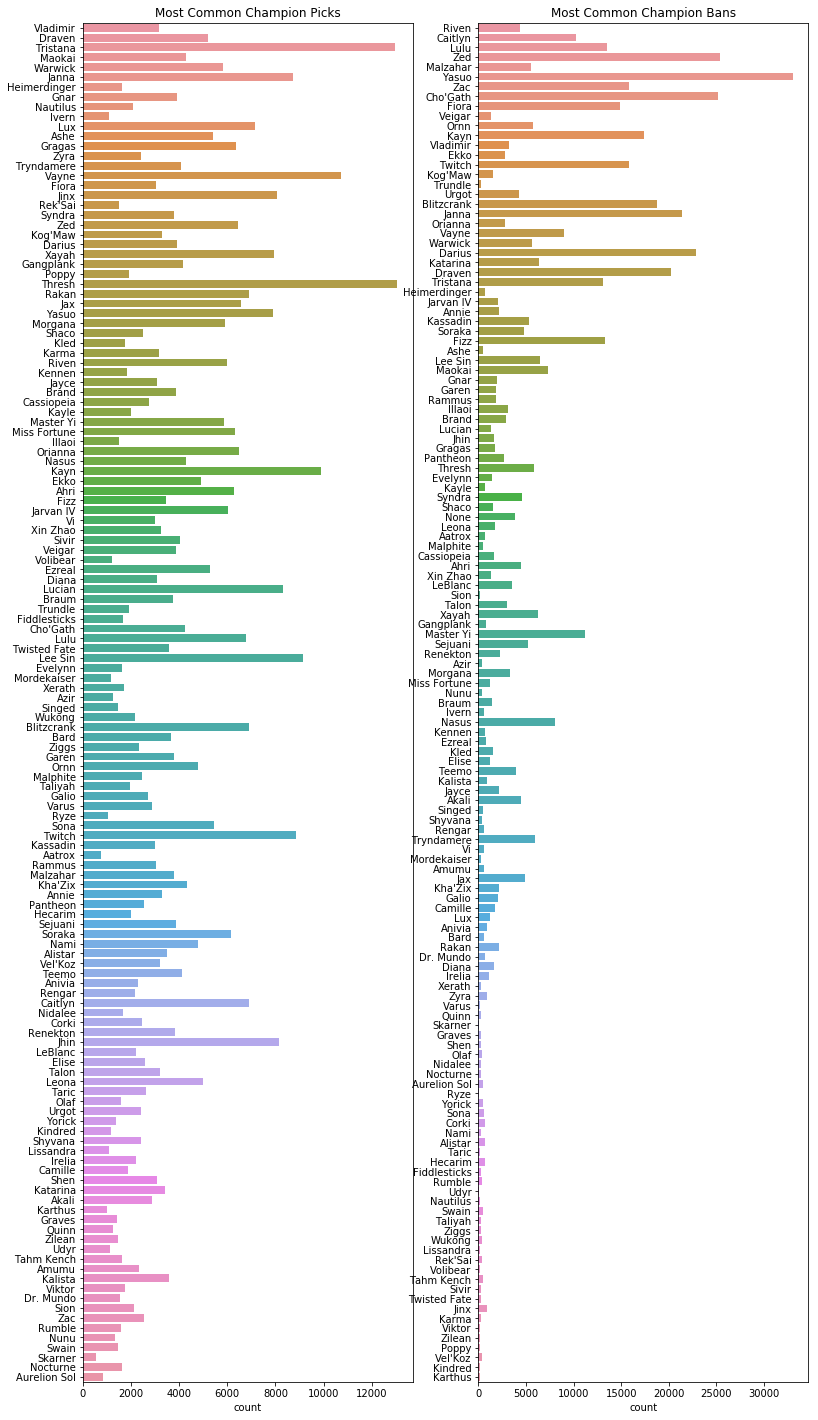

In [28]:
# Most common Champions picks and bans bar graph
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=False,figsize=(13,25))
sns.countplot(y=Pickslist, data=df1, ax=ax1)
ax1.set_title('Most Common Champion Picks')
sns.countplot(y=Banslist, data=df1, ax=ax2)
ax2.set_title('Most Common Champion Bans')
plt.show()

In [29]:
# list of sum spells Columns
SumSpellsColumns=['Team 1 Champ 1 Sum 1','Team 1 Champ 1 Sum 2','Team 1 Champ 2 Sum 1','Team 1 Champ 2 Sum 2'
                  ,'Team 1 Champ 3 Sum 1','Team 1 Champ 3 Sum 2','Team 1 Champ 4 Sum 1','Team 1 Champ 4 Sum 2'
                 , 'Team 1 Champ 5 Sum 1','Team 1 Champ 5 Sum 2','Team 2 Champ 1 Sum 1','Team 2 Champ 1 Sum 2'
                 , 'Team 2 Champ 2 Sum 1','Team 2 Champ 2 Sum 2','Team 2 Champ 3 Sum 1','Team 2 Champ 3 Sum 2'
                  ,'Team 2 Champ 4 Sum 1','Team 2 Champ 4 Sum 2','Team 2 Champ 5 Sum 1','Team 2 Champ 5 Sum 2']

In [30]:
# Most common Summoner Spells
AllSumSpells = df1[SumSpellsColumns].apply(pd.value_counts)
AllSumSpells['count'] = AllSumSpells[SumSpellsColumns].sum(axis=1)
AllSumSpells

,Team 1 Champ 1 Sum 1,Team 1 Champ 1 Sum 2,Team 1 Champ 2 Sum 1,Team 1 Champ 2 Sum 2,Team 1 Champ 3 Sum 1,Team 1 Champ 3 Sum 2,Team 1 Champ 4 Sum 1,Team 1 Champ 4 Sum 2,Team 1 Champ 5 Sum 1,Team 1 Champ 5 Sum 2,...,Team 2 Champ 1 Sum 2,Team 2 Champ 2 Sum 1,Team 2 Champ 2 Sum 2,Team 2 Champ 3 Sum 1,Team 2 Champ 3 Sum 2,Team 2 Champ 4 Sum 1,Team 2 Champ 4 Sum 2,Team 2 Champ 5 Sum 1,Team 2 Champ 5 Sum 2,count
Barrier,702,890,649,814,620,852,630,834,648,814,...,881,637,887,617,823,634,838,625,804,14880
Cleanse,160,199,151,153,135,168,136,134,125,182,...,190,129,159,136,182,154,181,149,184,3154
Exhaust,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,...,4459,3912,4596,3928,4704,3855,4717,3885,4511,84576
Flash,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,...,22204,28037,22427,28170,22255,28089,22322,27838,22589,504121
Ghost,744,798,678,706,647,750,664,689,720,800,...,761,715,706,690,712,672,737,665,711,14305
Heal,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,...,5934,4854,6197,4834,6173,4896,6276,4571,5746,108043
Ignite,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,...,5047,3823,4875,3758,4980,3715,4899,3956,5032,88258
Smite,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,...,5656,4690,5558,4621,5594,4894,5594,4777,5563,103062
Teleport,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,...,6358,4693,6085,4736,6067,4581,5926,5024,6350,109401


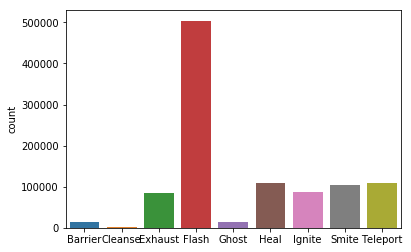

In [31]:
# Bar graph of summoner spells
sns.barplot(x=AllSumSpells.index,y=AllSumSpells['count'])
plt.show()

In [32]:
# Obtaining array of game length for a density curve. 
# Density Curve of game length done in R
# The density curve will be included in the report
GameDurationList=df1["Game Duration"].tolist()
GameDurationListMinutes= [x / 60 for x in GameDurationList]
GameDurationListMinutesInt = [ int(x) for x in GameDurationListMinutes ]
print(GameDurationListMinutesInt)

[32, 30, 24, 29, 34, 34, 33, 22, 23, 44, 23, 27, 34, 32, 39, 28, 39, 33, 25, 31, 33, 32, 25, 29, 36, 36, 41, 22, 38, 31, 26, 27, 31, 41, 40, 24, 25, 35, 34, 22, 38, 22, 30, 15, 36, 33, 34, 24, 38, 37, 42, 17, 21, 30, 28, 31, 23, 28, 27, 32, 30, 17, 27, 36, 3, 21, 41, 37, 28, 28, 27, 36, 26, 27, 35, 21, 43, 16, 48, 34, 34, 28, 3, 32, 24, 20, 29, 21, 36, 24, 25, 35, 34, 35, 33, 43, 29, 25, 20, 31, 28, 37, 26, 31, 38, 39, 30, 28, 43, 32, 20, 29, 19, 27, 29, 31, 21, 25, 54, 3, 15, 25, 22, 31, 15, 47, 37, 35, 22, 22, 31, 38, 23, 36, 22, 23, 27, 22, 41, 22, 35, 38, 29, 51, 15, 39, 19, 37, 45, 3, 27, 32, 28, 27, 36, 22, 29, 42, 26, 21, 37, 27, 23, 26, 24, 38, 25, 33, 39, 15, 34, 32, 26, 34, 29, 28, 20, 30, 26, 25, 22, 26, 39, 35, 55, 32, 42, 28, 41, 32, 35, 28, 31, 48, 35, 34, 27, 35, 29, 30, 23, 26, 21, 38, 34, 31, 38, 18, 50, 28, 20, 41, 33, 31, 44, 29, 44, 38, 25, 22, 41, 38, 23, 26, 38, 27, 28, 27, 24, 22, 30, 34, 42, 29, 29, 29, 32, 24, 31, 43, 28, 42, 29, 25, 22, 24, 25, 37, 23, 37, 36,

In [33]:
# How many games have blue team and red team won
df1['Winner'].value_counts()

blue team    26077
red team     25413
Name: Winner, dtype: int64

In [34]:
# Select only the games where blue team wins and get correspondig values for the First Tower column
df2=df1[df1['Winner']=="blue team"]['First Tower']
df2.value_counts()

blue team    18320
red team      7129
no one         628
Name: First Tower, dtype: int64

In [35]:
# Select only the games where red team wins and get correspondig values for the First Tower column
df3=df1[df1['Winner']=="red team"]['First Tower']
df3.value_counts()

red team     17287
blue team     7541
no one         585
Name: First Tower, dtype: int64

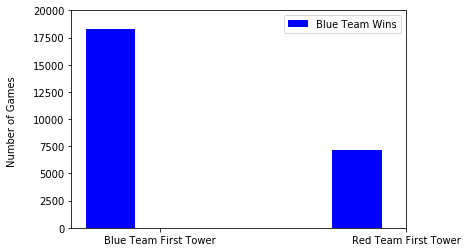

In [95]:
# Side By Side Bar Graphs when blue team wins:

Sex = ("Blue Team First Tower", "Red Team First Tower")

class_one = [18320,7129]


# Bar Graph:
 
fig, ax = plt.subplots()
y_position = np.arange(len(Sex))
bar_width = 0.2
 
bar1 = plt.bar(y_position, class_one, bar_width , color = "blue",
        label = "Blue Team Wins")
        

# Labels And Title:
 
plt.xlabel("\n ")
plt.ylabel("Number of Games \n")
 
csfont = {'fontname':'DejaVu Sans'}

 
plt.xticks(y_position + bar_width, Sex)
plt.legend(loc = "upper right")
 
axes = plt.gca()
axes.set_ylim([0, 20000])
 
 
plt.show()

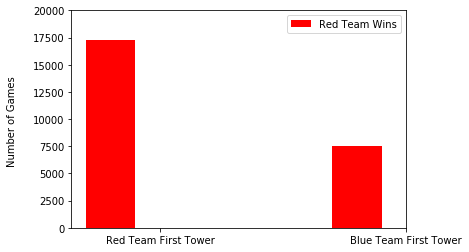

In [94]:
# Side By Side Bar Graphs when red team wins:

Sex = ("Red Team First Tower", "Blue Team First Tower")

class_one = [17287,7541]


# Bar Graph:
 
fig, ax = plt.subplots()
y_position = np.arange(len(Sex))
bar_width = 0.2
 
bar1 = plt.bar(y_position, class_one, bar_width , color = "red",
        label = "Red Team Wins")
        

# Labels And Title:
 
plt.xlabel("\n ")
plt.ylabel("Number of Games \n")
 
csfont = {'fontname':'DejaVu Sans'}

 
plt.xticks(y_position + bar_width, Sex)
plt.legend(loc = "upper right")
 
axes = plt.gca()
axes.set_ylim([0, 20000])
 
 
plt.show()

In [38]:
# Select only the games where blue team wins and count how many 
# flashes are in the blue team
# do this for each summoner of each player
df4=df1[df1['Winner']=="blue team"]['Team 1 Champ 1 Sum 1']
df4.value_counts()

Flash       14280
Teleport     2508
Smite        2386
Heal         2304
Ignite       1942
Exhaust      1843
Ghost         376
Barrier       355
Cleanse        83
Name: Team 1 Champ 1 Sum 1, dtype: int64

In [39]:
df5=df1[df1['Winner']=="blue team"]['Team 1 Champ 1 Sum 2']
df5.value_counts()

Flash       11260
Teleport     3250
Heal         2960
Smite        2829
Ignite       2590
Exhaust      2189
Barrier       483
Ghost         409
Cleanse       107
Name: Team 1 Champ 1 Sum 2, dtype: int64

In [40]:
df6=df1[df1['Winner']=="blue team"]['Team 1 Champ 2 Sum 1']
df6.value_counts()

Flash       14176
Heal         2467
Smite        2375
Teleport     2299
Exhaust      2017
Ignite       1994
Ghost         362
Barrier       313
Cleanse        74
Name: Team 1 Champ 2 Sum 1, dtype: int64

In [41]:
df7=df1[df1['Winner']=="blue team"]['Team 1 Champ 2 Sum 2']
df7.value_counts()

Flash       11386
Heal         3170
Teleport     3044
Smite        2788
Ignite       2473
Exhaust      2336
Barrier       452
Ghost         352
Cleanse        76
Name: Team 1 Champ 2 Sum 2, dtype: int64

In [42]:
df8=df1[df1['Winner']=="blue team"]['Team 1 Champ 3 Sum 1']
df8.value_counts()

Flash       14193
Heal         2466
Smite        2464
Teleport     2309
Exhaust      2000
Ignite       1930
Ghost         326
Barrier       323
Cleanse        66
Name: Team 1 Champ 3 Sum 1, dtype: int64

In [43]:
df9=df1[df1['Winner']=="blue team"]['Team 1 Champ 3 Sum 2']
df9.value_counts()

Flash       11312
Heal         3177
Teleport     2988
Smite        2765
Ignite       2567
Exhaust      2355
Barrier       422
Ghost         405
Cleanse        86
Name: Team 1 Champ 3 Sum 2, dtype: int64

In [44]:
df10=df1[df1['Winner']=="blue team"]['Team 1 Champ 4 Sum 1']
df10.value_counts()

Flash       14089
Heal         2563
Smite        2399
Teleport     2325
Exhaust      2050
Ignite       1887
Ghost         356
Barrier       330
Cleanse        78
Name: Team 1 Champ 4 Sum 1, dtype: int64

In [45]:
df11=df1[df1['Winner']=="blue team"]['Team 1 Champ 4 Sum 2']
df11.value_counts()

Flash       11437
Heal         3131
Teleport     3005
Smite        2780
Ignite       2541
Exhaust      2346
Barrier       447
Ghost         326
Cleanse        64
Name: Team 1 Champ 4 Sum 2, dtype: int64

In [46]:
df12=df1[df1['Winner']=="blue team"]['Team 1 Champ 5 Sum 1']
df12.value_counts()

Flash       14160
Teleport     2640
Smite        2402
Heal         2216
Ignite       1985
Exhaust      1917
Ghost         367
Barrier       322
Cleanse        68
Name: Team 1 Champ 5 Sum 1, dtype: int64

In [47]:
df13=df1[df1['Winner']=="blue team"]['Team 1 Champ 5 Sum 2']
df13.value_counts()

Flash       11327
Teleport     3143
Heal         2932
Smite        2929
Ignite       2584
Exhaust      2301
Ghost         393
Barrier       392
Cleanse        76
Name: Team 1 Champ 5 Sum 2, dtype: int64

In [48]:
# Do the same for red team

In [49]:
df14=df1[df1['Winner']=="red team"]['Team 1 Champ 1 Sum 1']
df14.value_counts()

Flash       13884
Teleport     2460
Smite        2325
Heal         2277
Ignite       1878
Exhaust      1797
Ghost         368
Barrier       347
Cleanse        77
Name: Team 1 Champ 1 Sum 1, dtype: int64

In [50]:
df15=df1[df1['Winner']=="red team"]['Team 1 Champ 1 Sum 2']
df15.value_counts()

Flash       10956
Teleport     3145
Smite        2806
Heal         2798
Ignite       2615
Exhaust      2205
Barrier       407
Ghost         389
Cleanse        92
Name: Team 1 Champ 1 Sum 2, dtype: int64

In [51]:
df16=df1[df1['Winner']=="red team"]['Team 1 Champ 2 Sum 1']
df16.value_counts()

Flash       13822
Heal         2455
Smite        2405
Teleport     2277
Exhaust      1887
Ignite       1838
Barrier       336
Ghost         316
Cleanse        77
Name: Team 1 Champ 2 Sum 1, dtype: int64

In [52]:
df17=df1[df1['Winner']=="red team"]['Team 1 Champ 2 Sum 2']
df17.value_counts()

Flash       11104
Heal         3139
Teleport     2910
Smite        2732
Ignite       2457
Exhaust      2278
Barrier       362
Ghost         354
Cleanse        77
Name: Team 1 Champ 2 Sum 2, dtype: int64

In [53]:
df18=df1[df1['Winner']=="red team"]['Team 1 Champ 3 Sum 1']
df18.value_counts()

Flash       13826
Heal         2436
Teleport     2355
Smite        2325
Exhaust      1928
Ignite       1856
Ghost         321
Barrier       297
Cleanse        69
Name: Team 1 Champ 3 Sum 1, dtype: int64

In [54]:
df19=df1[df1['Winner']=="red team"]['Team 1 Champ 3 Sum 2']
df19.value_counts()

Flash       11085
Teleport     3012
Heal         3003
Smite        2746
Exhaust      2383
Ignite       2327
Barrier       430
Ghost         345
Cleanse        82
Name: Team 1 Champ 3 Sum 2, dtype: int64

In [55]:
df20=df1[df1['Winner']=="red team"]['Team 1 Champ 4 Sum 1']
df20.value_counts()

Flash       13899
Heal         2408
Teleport     2326
Smite        2282
Exhaust      1942
Ignite       1890
Ghost         308
Barrier       300
Cleanse        58
Name: Team 1 Champ 4 Sum 1, dtype: int64

In [56]:
df21=df1[df1['Winner']=="red team"]['Team 1 Champ 4 Sum 2']
df21.value_counts()

Flash       10956
Teleport     3015
Heal         3005
Smite        2799
Ignite       2441
Exhaust      2377
Barrier       387
Ghost         363
Cleanse        70
Name: Team 1 Champ 4 Sum 2, dtype: int64

In [57]:
df23=df1[df1['Winner']=="red team"]['Team 1 Champ 5 Sum 1']
df23.value_counts()

Flash       13806
Teleport     2443
Smite        2366
Heal         2284
Ignite       1932
Exhaust      1846
Ghost         353
Barrier       326
Cleanse        57
Name: Team 1 Champ 5 Sum 1, dtype: int64

In [58]:
df24=df1[df1['Winner']=="red team"]['Team 1 Champ 5 Sum 2']
df24.value_counts()

Flash       11050
Teleport     3148
Heal         2894
Smite        2621
Ignite       2509
Exhaust      2256
Barrier       422
Ghost         407
Cleanse       106
Name: Team 1 Champ 5 Sum 2, dtype: int64

In [59]:
# Total number of flashes in blue winning team = 127620
# Total number of flashes in blue losing team = 124388

In [60]:
# Select only the games where blue team wins and count how many 
# flashes are in the red team this time
# do this for each summoner of each player
df25=df1[df1['Winner']=="blue team"]['Team 2 Champ 1 Sum 1']
df25.value_counts()

Flash       14216
Teleport     2571
Smite        2329
Heal         2324
Ignite       1930
Exhaust      1893
Ghost         378
Barrier       359
Cleanse        77
Name: Team 2 Champ 1 Sum 1, dtype: int64

In [61]:
df25=df1[df1['Winner']=="blue team"]['Team 2 Champ 1 Sum 2']
df25.value_counts()

Flash       11301
Teleport     3246
Heal         2965
Smite        2872
Ignite       2545
Exhaust      2238
Barrier       430
Ghost         384
Cleanse        96
Name: Team 2 Champ 1 Sum 2, dtype: int64

In [62]:
df26=df1[df1['Winner']=="blue team"]['Team 2 Champ 2 Sum 1']
df26.value_counts()

Flash       14196
Heal         2495
Smite        2365
Teleport     2322
Exhaust      1997
Ignite       1944
Ghost         354
Barrier       330
Cleanse        74
Name: Team 2 Champ 2 Sum 1, dtype: int64

In [63]:
df27=df1[df1['Winner']=="blue team"]['Team 2 Champ 2 Sum 2']
df27.value_counts()

Flash       11360
Heal         3182
Teleport     3095
Smite        2792
Ignite       2442
Exhaust      2342
Barrier       433
Ghost         360
Cleanse        71
Name: Team 2 Champ 2 Sum 2, dtype: int64

In [64]:
df28=df1[df1['Winner']=="blue team"]['Team 2 Champ 3 Sum 1']
df28.value_counts()

Flash       14328
Teleport     2451
Heal         2412
Smite        2269
Exhaust      1990
Ignite       1910
Ghost         351
Barrier       289
Cleanse        77
Name: Team 2 Champ 3 Sum 1, dtype: int64

In [65]:
df29=df1[df1['Winner']=="blue team"]['Team 2 Champ 3 Sum 2']
df29.value_counts()

Flash       11204
Heal         3172
Teleport     3110
Smite        2801
Ignite       2512
Exhaust      2392
Barrier       438
Ghost         364
Cleanse        84
Name: Team 2 Champ 3 Sum 2, dtype: int64

In [66]:
df30=df1[df1['Winner']=="blue team"]['Team 2 Champ 4 Sum 1']
df30.value_counts()

Flash       14152
Smite        2476
Heal         2441
Teleport     2392
Exhaust      2024
Ignite       1874
Ghost         334
Barrier       300
Cleanse        84
Name: Team 2 Champ 4 Sum 1, dtype: int64

In [67]:
df31=df1[df1['Winner']=="blue team"]['Team 2 Champ 4 Sum 2']
df31.value_counts()

Flash       11385
Heal         3143
Teleport     2940
Smite        2849
Ignite       2501
Exhaust      2359
Barrier       422
Ghost         379
Cleanse        99
Name: Team 2 Champ 4 Sum 2, dtype: int64

In [68]:
df32=df1[df1['Winner']=="blue team"]['Team 2 Champ 5 Sum 1']
df32.value_counts()

Flash       14036
Teleport     2521
Smite        2485
Heal         2350
Ignite       2002
Exhaust      1956
Barrier       326
Ghost         316
Cleanse        85
Name: Team 2 Champ 5 Sum 1, dtype: int64

In [69]:
df33=df1[df1['Winner']=="blue team"]['Team 2 Champ 5 Sum 2']
df33.value_counts()

Flash       11499
Teleport     3213
Smite        2847
Heal         2845
Ignite       2521
Exhaust      2295
Barrier       389
Ghost         378
Cleanse        90
Name: Team 2 Champ 5 Sum 2, dtype: int64

In [70]:
# Do the same for the other team

In [71]:
df34=df1[df1['Winner']=="red team"]['Team 2 Champ 1 Sum 1']
df34.value_counts()

Flash       13966
Teleport     2408
Smite        2262
Heal         2153
Ignite       2007
Exhaust      1863
Ghost         362
Barrier       322
Cleanse        70
Name: Team 2 Champ 1 Sum 1, dtype: int64

In [72]:
df35=df1[df1['Winner']=="red team"]['Team 2 Champ 1 Sum 2']
df35.value_counts()

Flash       10903
Teleport     3112
Heal         2969
Smite        2784
Ignite       2502
Exhaust      2221
Barrier       451
Ghost         377
Cleanse        94
Name: Team 2 Champ 1 Sum 2, dtype: int64

In [73]:
df36=df1[df1['Winner']=="red team"]['Team 2 Champ 2 Sum 1']
df36.value_counts()

Flash       13841
Teleport     2371
Heal         2359
Smite        2325
Exhaust      1915
Ignite       1879
Ghost         361
Barrier       307
Cleanse        55
Name: Team 2 Champ 2 Sum 1, dtype: int64

In [74]:
df37=df1[df1['Winner']=="red team"]['Team 2 Champ 2 Sum 2']
df37.value_counts()

Flash       11067
Heal         3015
Teleport     2990
Smite        2766
Ignite       2433
Exhaust      2254
Barrier       454
Ghost         346
Cleanse        88
Name: Team 2 Champ 2 Sum 2, dtype: int64

In [75]:
df38=df1[df1['Winner']=="red team"]['Team 2 Champ 3 Sum 1']
df38.value_counts()

Flash       13842
Heal         2422
Smite        2352
Teleport     2285
Exhaust      1938
Ignite       1848
Ghost         339
Barrier       328
Cleanse        59
Name: Team 2 Champ 3 Sum 1, dtype: int64

In [76]:
df39=df1[df1['Winner']=="red team"]['Team 2 Champ 3 Sum 2']
df39.value_counts()

Flash       11051
Heal         3001
Teleport     2957
Smite        2793
Ignite       2468
Exhaust      2312
Barrier       385
Ghost         348
Cleanse        98
Name: Team 2 Champ 3 Sum 2, dtype: int64

In [77]:
df40=df1[df1['Winner']=="red team"]['Team 2 Champ 4 Sum 1']
df40.value_counts()

Flash       13937
Heal         2455
Smite        2418
Teleport     2189
Ignite       1841
Exhaust      1831
Ghost         338
Barrier       334
Cleanse        70
Name: Team 2 Champ 4 Sum 1, dtype: int64

In [78]:
df41=df1[df1['Winner']=="red team"]['Team 2 Champ 4 Sum 2']
df41.value_counts()

Flash       10937
Heal         3133
Teleport     2986
Smite        2745
Ignite       2398
Exhaust      2358
Barrier       416
Ghost         358
Cleanse        82
Name: Team 2 Champ 4 Sum 2, dtype: int64

In [79]:
df42=df1[df1['Winner']=="red team"]['Team 2 Champ 5 Sum 1']
df42.value_counts()

Flash       13802
Teleport     2503
Smite        2292
Heal         2221
Ignite       1954
Exhaust      1929
Ghost         349
Barrier       299
Cleanse        64
Name: Team 2 Champ 5 Sum 1, dtype: int64

In [80]:
df43=df1[df1['Winner']=="red team"]['Team 2 Champ 5 Sum 2']
df43.value_counts()

Flash       11090
Teleport     3137
Heal         2901
Smite        2716
Ignite       2511
Exhaust      2216
Barrier       415
Ghost         333
Cleanse        94
Name: Team 2 Champ 5 Sum 2, dtype: int64

In [81]:
# Total number of flashes in red winning team = 127677
# Total number of flashes in red losing team = 113499

In [82]:
# How many barons the winning team kills baron (blue)
df44=df1[df1['Winner']=="blue team"]['Team 1 Baron Kills']
df44.value_counts()

0    12853
1    11305
2     1808
3      103
4        8
Name: Team 1 Baron Kills, dtype: int64

In [83]:
#Total blue team baron kills, blue team winning
11305+(1808*2)+(103*3)+(8*4)

15262

In [84]:
# How many barons the winning teamkills baron (red)
df45=df1[df1['Winner']=="red team"]['Team 2 Baron Kills']
df45.value_counts()

1    11990
0    11070
2     2216
3      127
4       10
Name: Team 2 Baron Kills, dtype: int64

In [85]:
#Total red team baron kills, red team winning 
11990+(2*2216)+(3*127)+(10*4)

16843

In [86]:
# How many barons the losing team kills baron (blue)
df46=df1[df1['Winner']=="blue team"]['Team 2 Baron Kills']
df46.value_counts()

0    22277
1     3183
2      538
3       73
4        6
Name: Team 2 Baron Kills, dtype: int64

In [87]:
#Total red team baron kills, blue team winning 
3183+(538*2)+(73*3)+(6*4)

4502

In [88]:
# How many barons the losing team kills baron (red)
df47=df1[df1['Winner']=="red team"]['Team 1 Baron Kills']
df47.value_counts()

0    22048
1     2874
2      443
3       46
5        1
4        1
Name: Team 1 Baron Kills, dtype: int64

In [89]:
#Total blue team baron kills, red team winning 
2874+(443*2)+(46*3)+(10*1)+(5*1)

3913

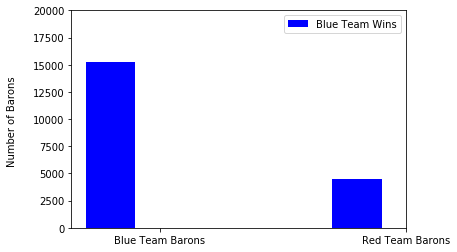

In [93]:
# Side By Side Bar Graphs when blue team wins:

Sex = ("Blue Team Barons", "Red Team Barons")

class_one = [15262,4502]


# Bar Graph:
 
fig, ax = plt.subplots()
y_position = np.arange(len(Sex))
bar_width = 0.2
 
bar1 = plt.bar(y_position, class_one, bar_width , color = "blue",
        label = "Blue Team Wins")
        

# Labels And Title:
 
plt.xlabel("\n ")
plt.ylabel("Number of Barons \n")
 
csfont = {'fontname':'DejaVu Sans'}

 
plt.xticks(y_position + bar_width, Sex)
plt.legend(loc = "upper right")
 
axes = plt.gca()
axes.set_ylim([0, 20000])
 
 
plt.show()

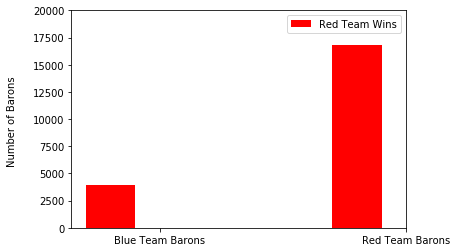

In [92]:
# Side By Side Bar Graphs when blue team wins:

Sex = ("Blue Team Barons", "Red Team Barons")

class_one = [3913,16843]


# Bar Graph:
 
fig, ax = plt.subplots()
y_position = np.arange(len(Sex))
bar_width = 0.2
 
bar1 = plt.bar(y_position, class_one, bar_width , color = "red",
        label = "Red Team Wins")
        

# Labels And Title:
 
plt.xlabel("\n ")
plt.ylabel("Number of Barons \n")
 
csfont = {'fontname':'DejaVu Sans'}

 
plt.xticks(y_position + bar_width, Sex)
plt.legend(loc = "upper right")
 
axes = plt.gca()
axes.set_ylim([0, 20000])
 
 
plt.show()